# Nectaerra Schagen (Kruiszwin)

Excercises, plotting boreholes, and setting up the model

@TO 20201015

In [198]:
from fdm import Grid

In [199]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch, Circle
from matplotlib.transforms import Bbox
import pandas as pd
import flopy
from importlib import reload
import pdb

import os
import sys
tools   = '/Users/Theo/GRWMODELS/python/tools/'
GIS     = '/Users/Theo/GRWMODELS/python/Nectaerra/Kruiszwin/data/spatial/'
src     = '/Users/Theo/GRWMODELS/python/Nectaerra/Kruiszwin/src/'
home    = '/Users/Theo/GRWMODELS/python/Nectaerra/Kruiszwin/'

sys.path.insert(0, tools)
sys.path.insert(0, src)

import kruiszwin as kzw
from fdm import Grid

os.chdir(home)

attribs = lambda obj: [o for o in dir(obj) if not o.startswith('_')]

# Get the data, which are all stored in an Excel workbook

In [216]:
reload(kzw) # Necessary only when debugging.

# Parameters to generate the model. Well use this as **kwargs

# Get the data from a cross section
dirs = kzw.Dir_struct(home=home, case_folder='Kruiszwin_1',
    executables={'mflow':'mf2005.mac', 'mt3d': 'mt3dms5b.mac', 'seawat':'swt_v4.mac'})

workbook   = os.path.join(dirs.data, "Julianadorp.xlsx")
layers_df  = pd.read_excel(workbook, sheet_name='Boringen', engine="openpyxl")
piez_df    = pd.read_excel(workbook, sheet_name='Peilbuizen',
                        skiprows=[1], index_col=0, engine="openpyxl")
soil_props = pd.read_excel(workbook, sheet_name='Grondsoort',
                           index_col=0, engine="openpyxl")
spd_df     = pd.read_excel(workbook, sheet_name='SPD', index_col=0, engine="openpyxl")

In [217]:
np.unique(layers_df['name'])

array(['DKMG001', 'DKMG002', 'DKMG003', 'DKMG004', 'DKMG007', 'DKMG010',
       'DKMG101', 'DKMG102', 'DKMG103', 'DKMG104', 'DKMG105', 'DKMG107',
       'DKMG110', 'KRW1', 'KRW2', 'KRW3', 'Rioolgemaal'], dtype=object)

In [218]:
# Get piezometers object (could also be a list)
reload(kzw)
piezoms = kzw.Piezometers(piez_df)

# Make a list of Boring objects and reset their index
borehole = dict()
borehole_names = np.unique(layers_df['name'])
for name in borehole_names:
    borehole[name] = kzw.Boring(name, layers_df.loc[layers_df['name'] == name].copy())                                        
    borehole[name].layers.index = np.arange(len(borehole[name].layers.index), dtype=int)
    # We still have to run method make_layer_patches_and_paths(xlim=(xmin,xmax))
    # Before we can plot the layers. We do than when we know the grid.

## Show the boreholes and the piezometers next to each other

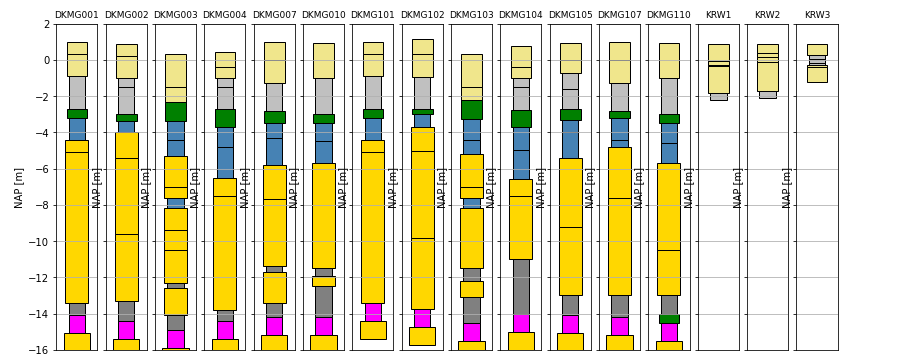

In [219]:
# piezoms.plot() # show piezometes

The purple and orange layers at the bottom are dymmy layers representing the top of the Pleistocene (purple, clay, 100 days, 1 m thick, and orange, sand 25 m/d down to NAP -250 m). These extra layers are necessary for the numerice model.

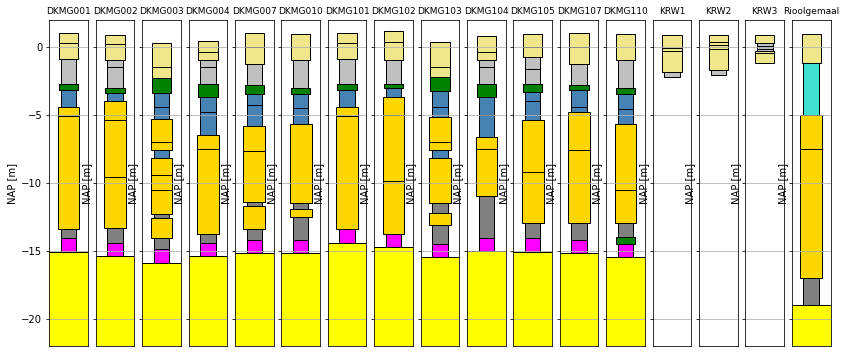

In [220]:
kzw.plot_bores(borehole, title_fontsize=9, ylim=(-22, 2)) # Show boreholes

In [221]:
soil_props

,ibound,strthd,color,width,kh,kv,por,Sy,Ss,al,rho_s,rhob_dry,rhob_wet
name,,,,,,,,,,,,,
zand_H1,-1.0,0.00,khaki,1.25,5.000,1.000,0.350000,0.20,0.00001,0.1,2650.000000,1722.500000,2072.500000
klei_slap,1.0,0.00,silver,1.00,0.020,0.004,0.400000,0.05,0.00001,0.1,2650.000000,1590.000000,1990.000000
veen,1.0,0.00,green,1.25,0.005,0.001,0.500000,0.20,0.00001,0.1,1200.000000,600.000000,1100.000000
klei_blauw,1.0,-0.68,steelblue,1.00,0.020,0.004,0.350000,0.05,0.00001,0.1,2650.000000,1722.500000,2072.500000
zand_H2,-2.0,-0.68,gold,1.40,10.000,2.000,0.350000,0.20,0.00001,0.1,2650.000000,1722.500000,2072.500000
klei_Hb,1.0,-0.68,gray,1.00,0.020,0.004,0.400000,0.05,0.00001,0.1,2650.000000,1590.000000,1990.000000
veen_Hb,1.0,-0.68,green,1.25,0.005,0.001,0.500000,0.05,0.00001,0.1,1200.000000,600.000000,1100.000000
klei_Pleis_Top,1.0,-0.68,magenta,1.00,0.010,0.002,0.400000,0.05,0.00001,0.1,2650.000000,1590.000000,1990.000000
zand_Pleist,-3.0,-0.68,yellow,1.60,62.500,1.000,0.400000,0.20,0.00001,0.1,2650.000000,1590.000000,1990.000000


In [206]:
trenches = kzw.Trench_collection(os.path.join(GIS, 'punten.shp'),
                      os.path.join(GIS, 'Kruiswin12(345)_lijn.shp'), mv=0.76)

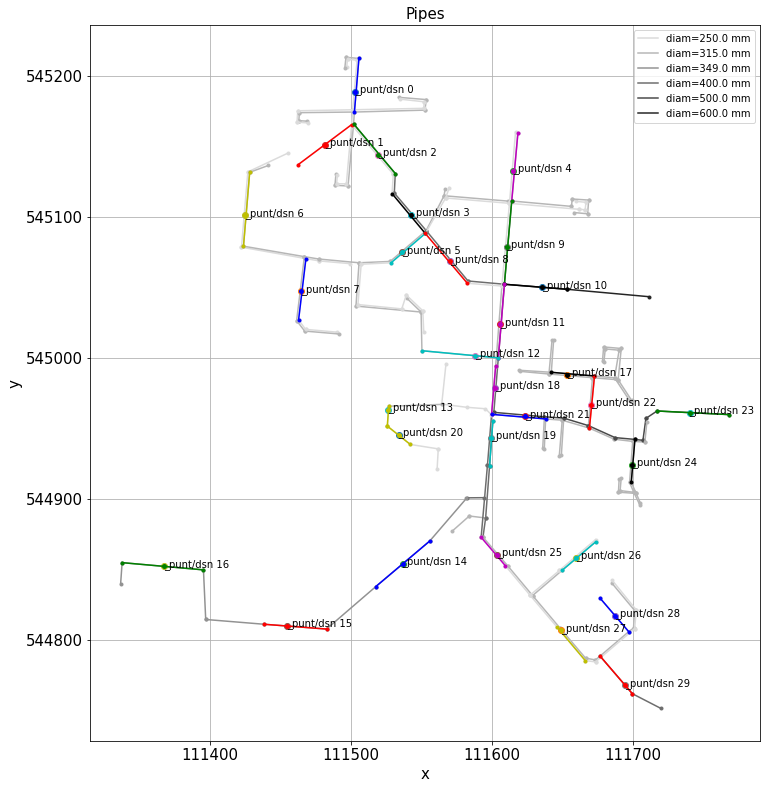

In [207]:
ax = kzw.newfig("Pipes","x","y", size_inches=(12, 17))
trenches.plot_pipes(ax=ax)
trenches.plot_points(ax=ax)
ax.set_aspect(1.)

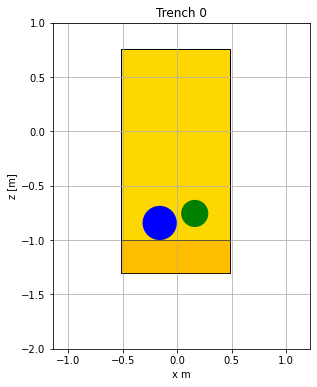

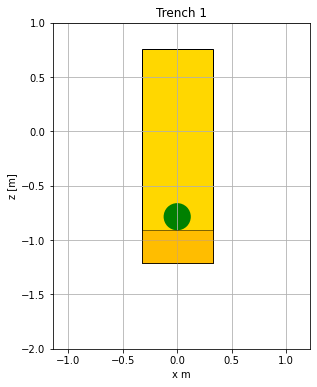

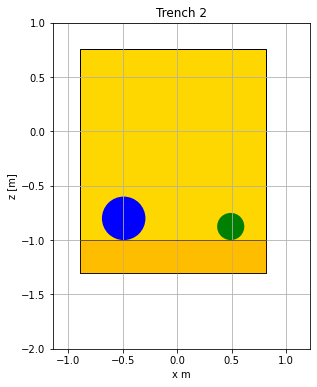

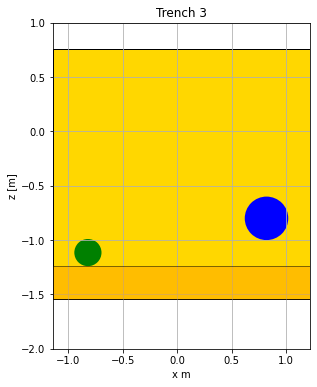

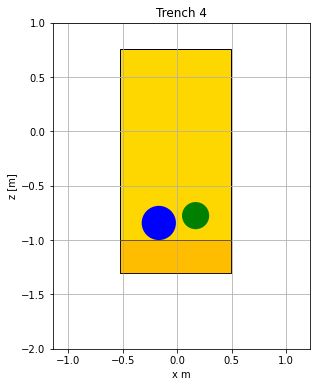

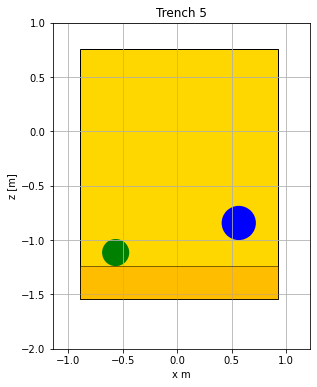

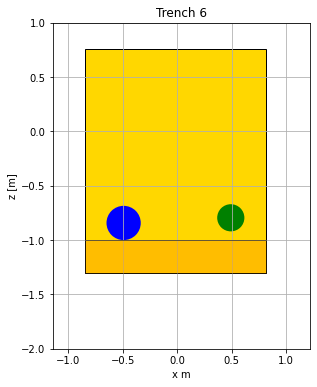

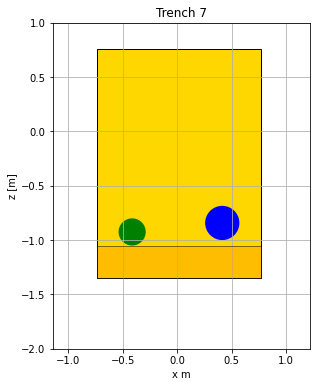

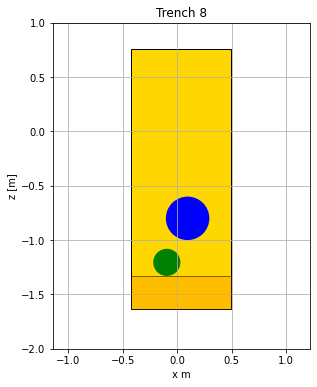

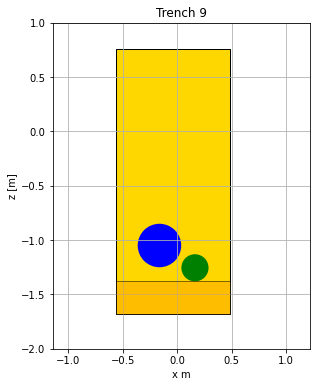

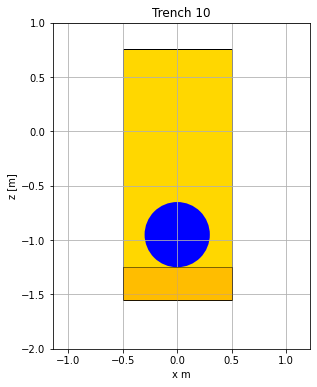

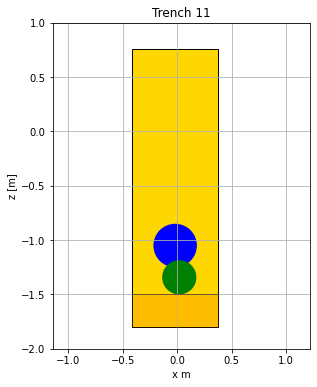

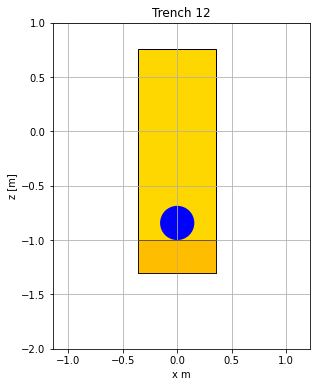

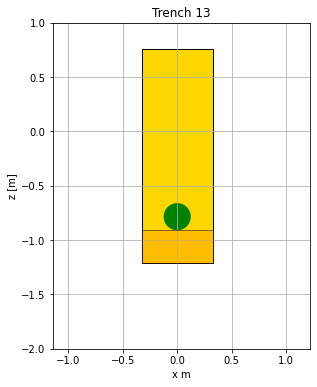

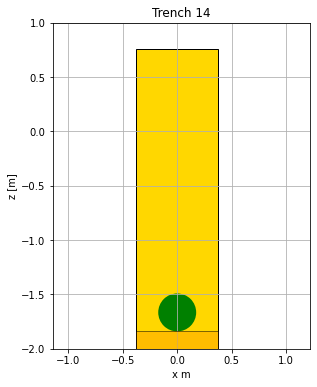

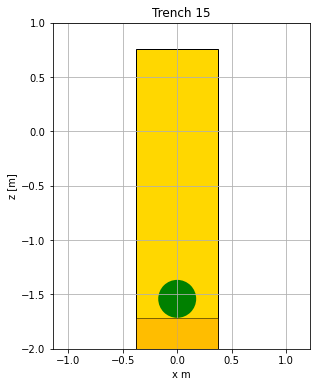

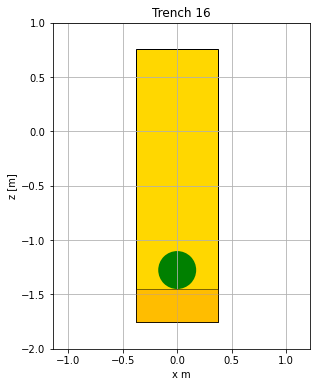

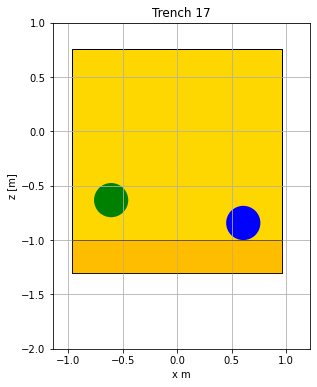

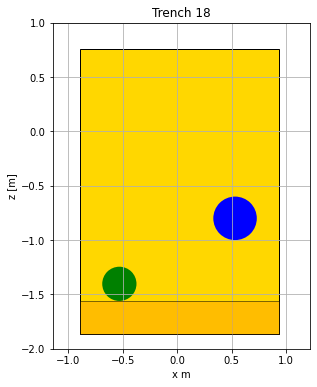

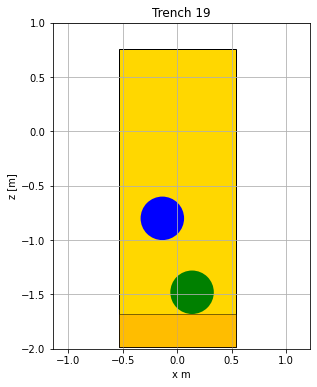

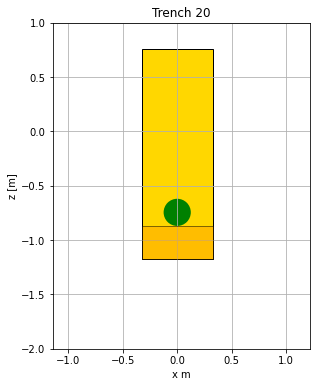

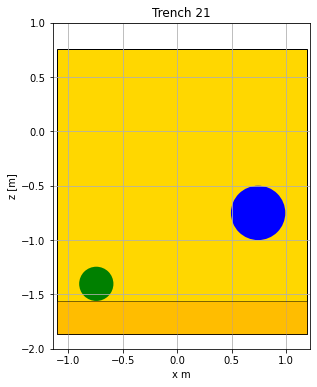

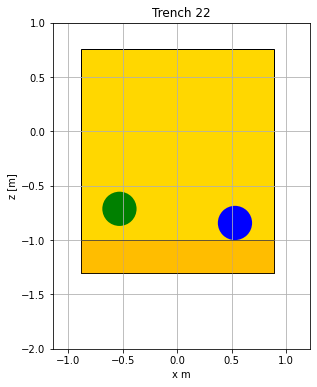

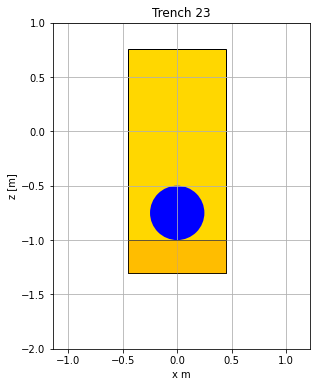

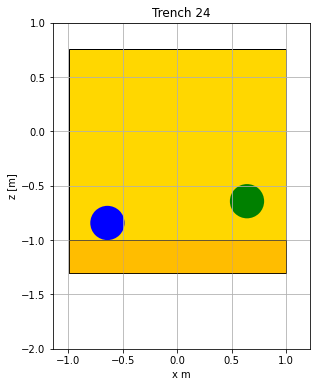

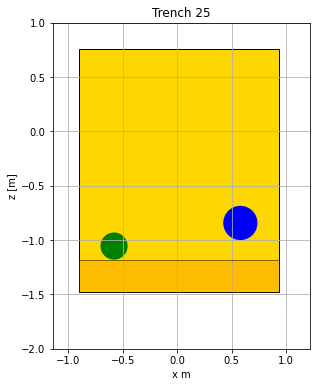

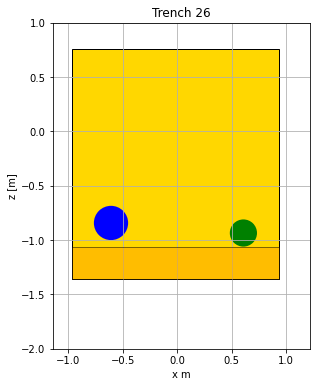

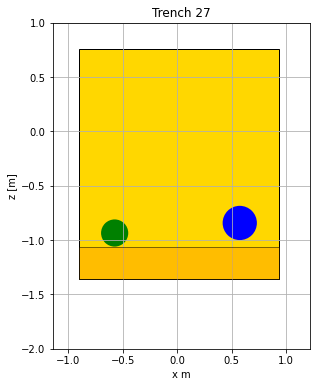

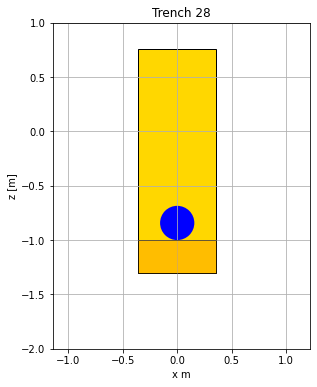

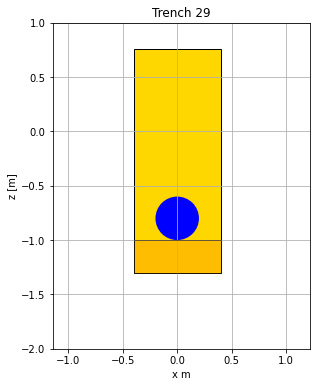

In [10]:
trenches.plot_trenches(ylim=(-2, 1))

In [11]:
borehole.keys()

dict_keys(['DKMG001', 'DKMG002', 'DKMG003', 'DKMG004', 'DKMG007', 'DKMG010', 'DKMG101', 'DKMG102', 'DKMG103', 'DKMG104', 'DKMG105', 'DKMG107', 'DKMG110', 'KRW1', 'KRW2', 'KRW3'])

# Show section with trench and pipe based on borehole with given name

In [12]:
borehole[name].layers

,name,NAPtop,NAPbot,D,soiltype,stype,ibound,strthd,color,profile_width,...,por,Sy,Ss,al,rhos,rhob_dry,rhob_wet,profile_patch,layer_patch,path
0,KRW3,0.89,0.25,0.64,"zand, kleiig, zeer fijn, veel roestvlekken, kl...",zand_H1,-1,0.0,khaki,1.25,...,0.35,0.20,0.200000,0.1,2650,1722.5,2072.5,"PathPatch5((-0.3125, 0.89) ...)","PathPatch5((-5, 0.89) ...)","Path(array([[-5. , 0.89],\n [-5. , 0..."
1,KRW3,0.25,0.06,0.19,"klei, matig zandig, zandfracties, donkergrijs",klei_slap,1,0.0,silver,1.00,...,0.40,0.05,0.000002,0.1,2650,1590.0,1990.0,"PathPatch5((-0.25, 0.25) ...)","PathPatch5((-5, 0.25) ...)","Path(array([[-5. , 0.25],\n [-5. , 0..."
2,KRW3,0.06,-0.17,0.23,"klei, sterk zandig, zandlagen, grijs",klei_slap,1,0.0,silver,1.00,...,0.40,0.05,0.000002,0.1,2650,1590.0,1990.0,"PathPatch5((-0.25, 0.06) ...)","PathPatch5((-5, 0.06) ...)","Path(array([[-5. , 0.06],\n [-5. , -0..."
3,KRW3,-0.17,-0.31,0.14,"klei, zwak siltig, lichtgrijs",klei_slap,1,0.0,silver,1.00,...,0.40,0.05,0.000001,0.1,2650,1590.0,1990.0,"PathPatch5((-0.25, -0.17) ...)","PathPatch5((-5, -0.17) ...)","Path(array([[-5. , -0.17],\n [-5. , -0..."
4,KRW3,-0.31,-0.42,0.11,"zand, sterk siltig, matig humeus, bruin",zand_H1,-1,0.0,khaki,1.25,...,0.35,0.20,0.000001,0.1,2650,1722.5,2072.5,"PathPatch5((-0.3125, -0.31) ...)","PathPatch5((-5, -0.31) ...)","Path(array([[-5. , -0.31],\n [-5. , -0..."
5,KRW3,-0.42,-1.21,0.79,"zand, matig siltig, matig humeus, kleiffacties...",zand_H1,-1,0.0,khaki,1.25,...,0.35,0.20,0.000008,0.1,2650,1722.5,2072.5,"PathPatch5((-0.3125, -0.42) ...)","PathPatch5((-5, -0.42) ...)","Path(array([[-5. , -0.42],\n [-5. , -1..."


In [13]:
# Need gr to plot this. gr is defined further down.
# name = 'DKMG010'
# for itr in range(10,20):
#     ax = kzw.newfig("Profile, trench {}, borehole={}".format(itr, name), "x-section", "NAP")
#     kzw.plot_section(boring=borehole[name], trench=trenches.trenches[itr], xlim=gr.x[[0, -1]], ylim=(-16, 2), ax=ax)

Trench 21 is de diepste in combinatie met de breedste. Trenches met buisdiameter 349 zijn buizen waarvan geen buisdiamter bekend was in het ontvangen bestand.

# Salinities

Instantiate a `Salinity_profiles` object (in module `'kruiszwin.py`, that will hold the profiles in an internal dict called `self.profiles`. The keys are the borehole/location names and the fields are `mv`, `Depth [m]`, `z`, `TDS [mg/l]`. `z` is elevation relative to NAP datum.

We can plot each and every profile as shown next. And we can interpolate the data to a desired set of depths.

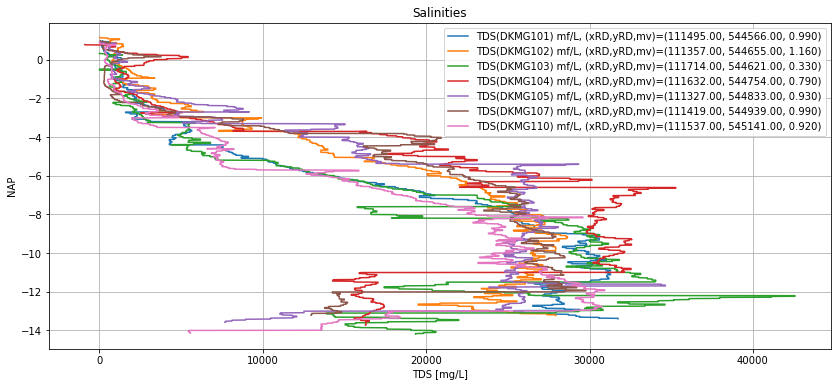

In [14]:
reload(kzw)
tds_profiles = kzw.Salinity_profile_collection(workbook, sheet_name='Salinities', coords_sheet='Coords')

ax = kzw.newfig("Salinities", "TDS [mg/L]", "NAP")

tds_profiles.plot(ax=ax)
ax.legend()

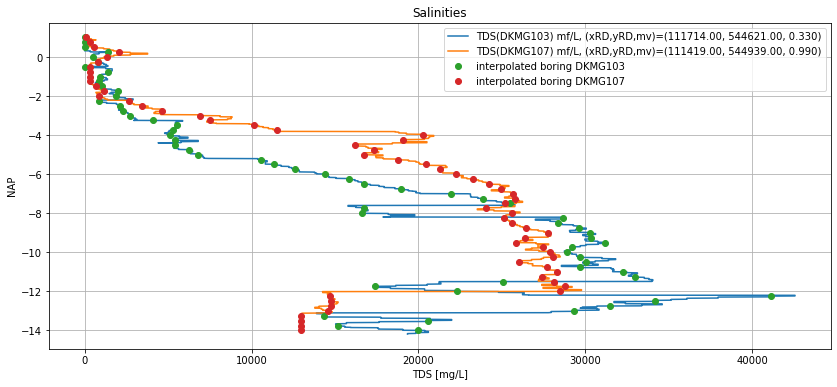

In [15]:
ax = kzw.newfig("Salinities", "TDS [mg/L]", "NAP")
names = ['DKMG103', 'DKMG107']

# Show these specific profiles
tds_profiles.plot(names=names, ax=ax)

# Interpolate and show them on top of the previous ones
zdata=np.linspace(1, -14, 61)
for name in names:
    ZTDS = tds_profiles[name].interp(zdata=np.linspace(1, -14, 61))
    ax.plot(ZTDS[0], ZTDS[1], 'o', label="interpolated boring {}".format(name))
ax.legend()

# Show salinities on/with a section

Using subplots(2, 1, sharey=True)

In [16]:
names = set(borehole.keys()).intersection(tds_profiles.profiles.keys())
names

{'DKMG101', 'DKMG102', 'DKMG103', 'DKMG104', 'DKMG105', 'DKMG107', 'DKMG110'}

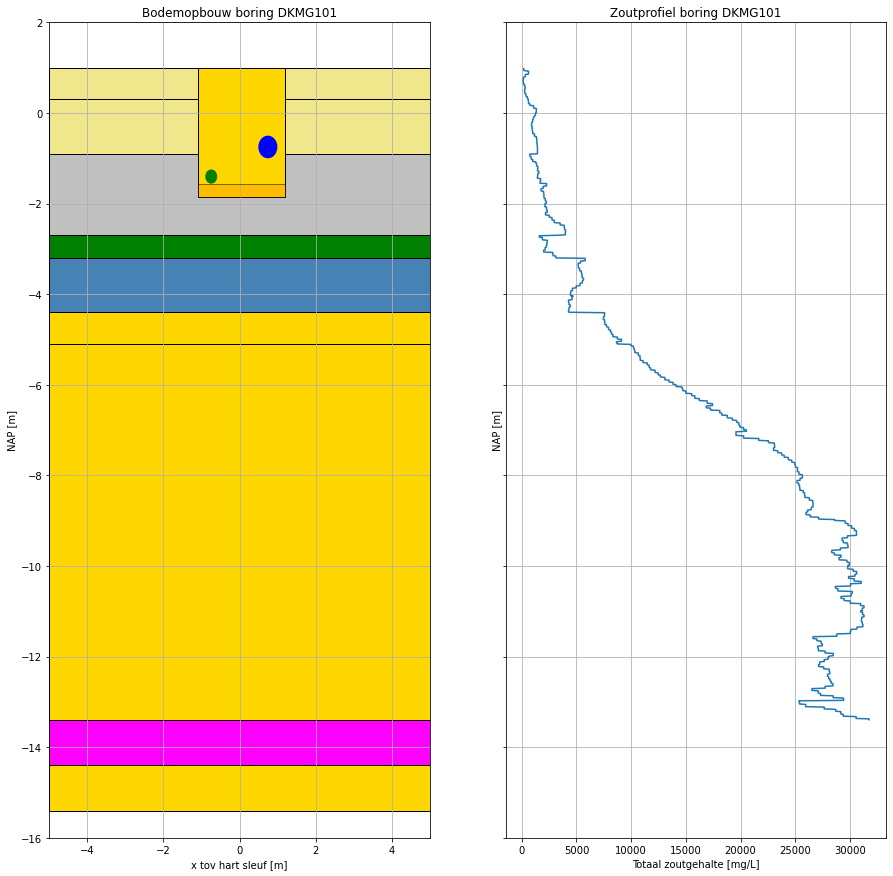

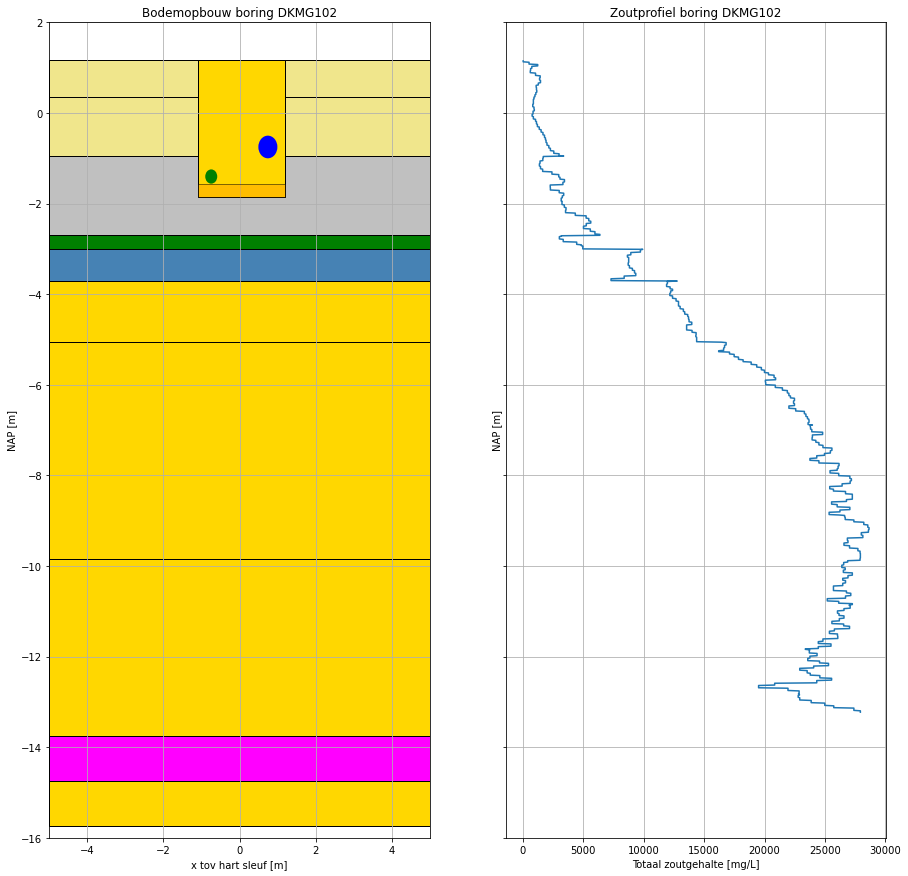

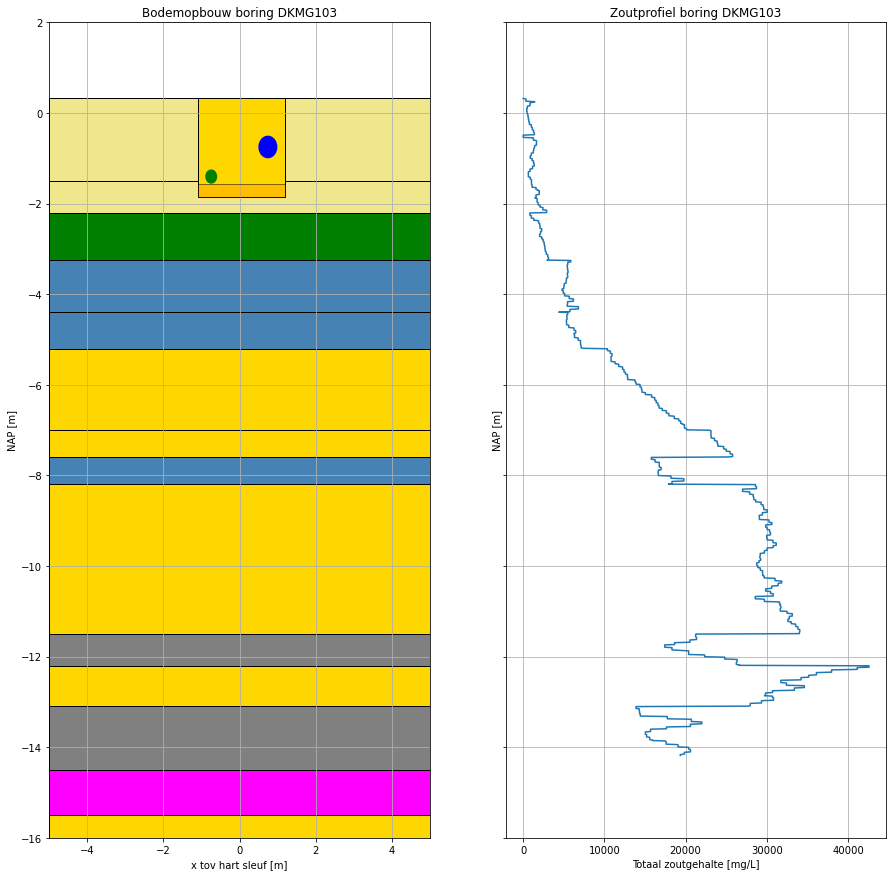

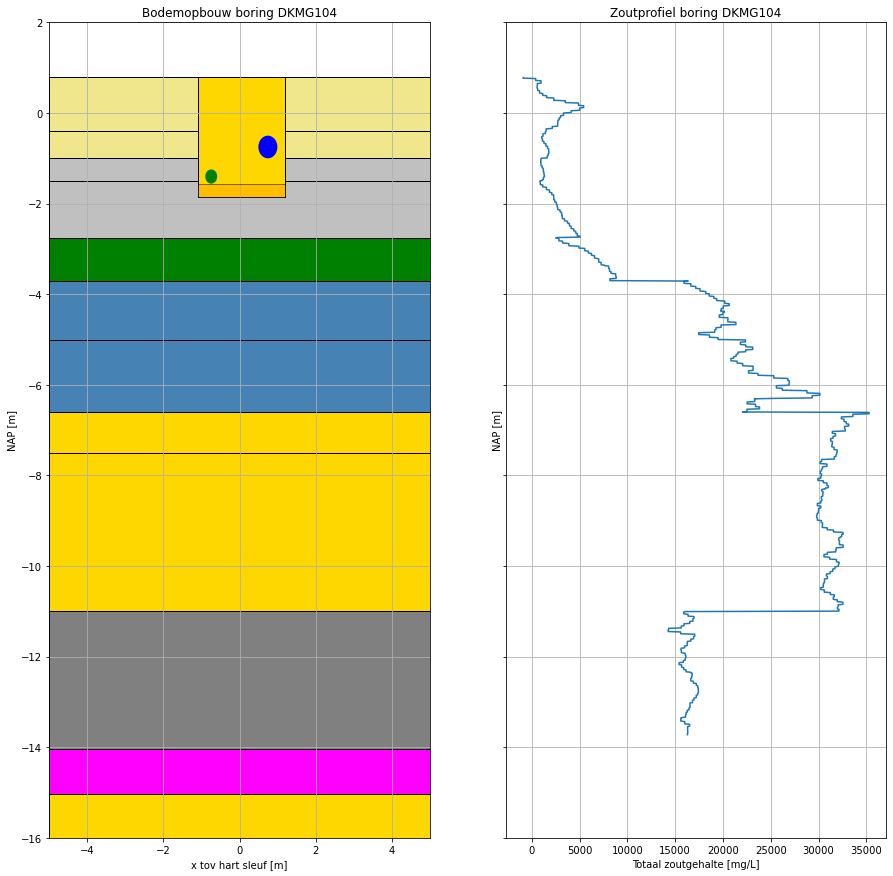

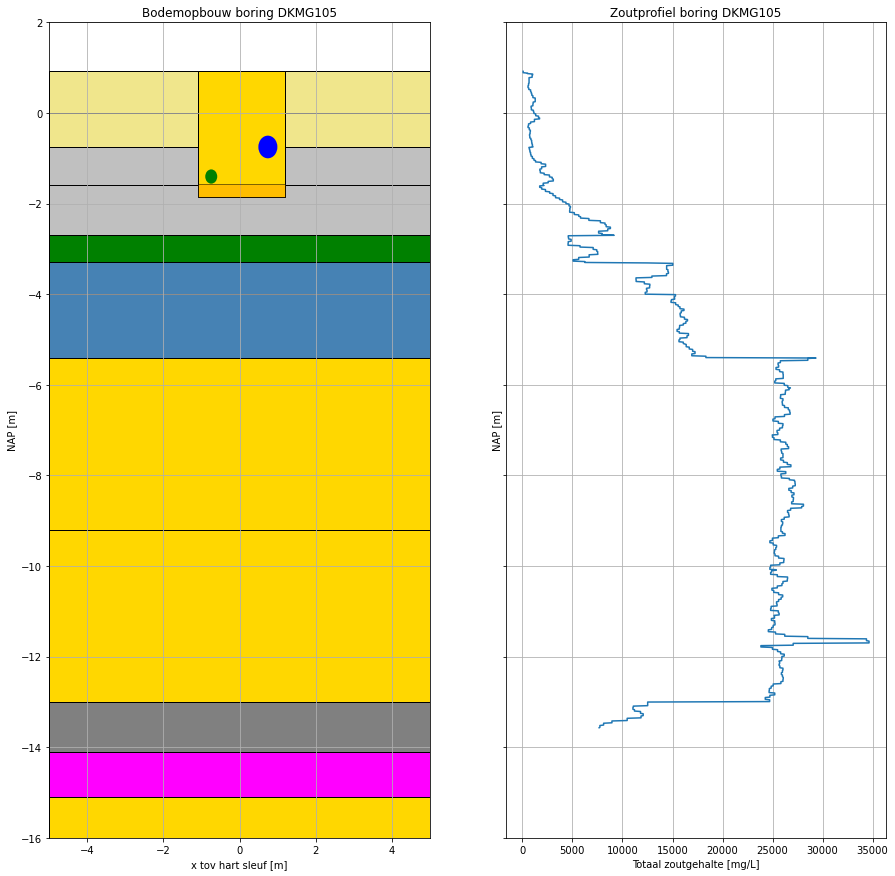

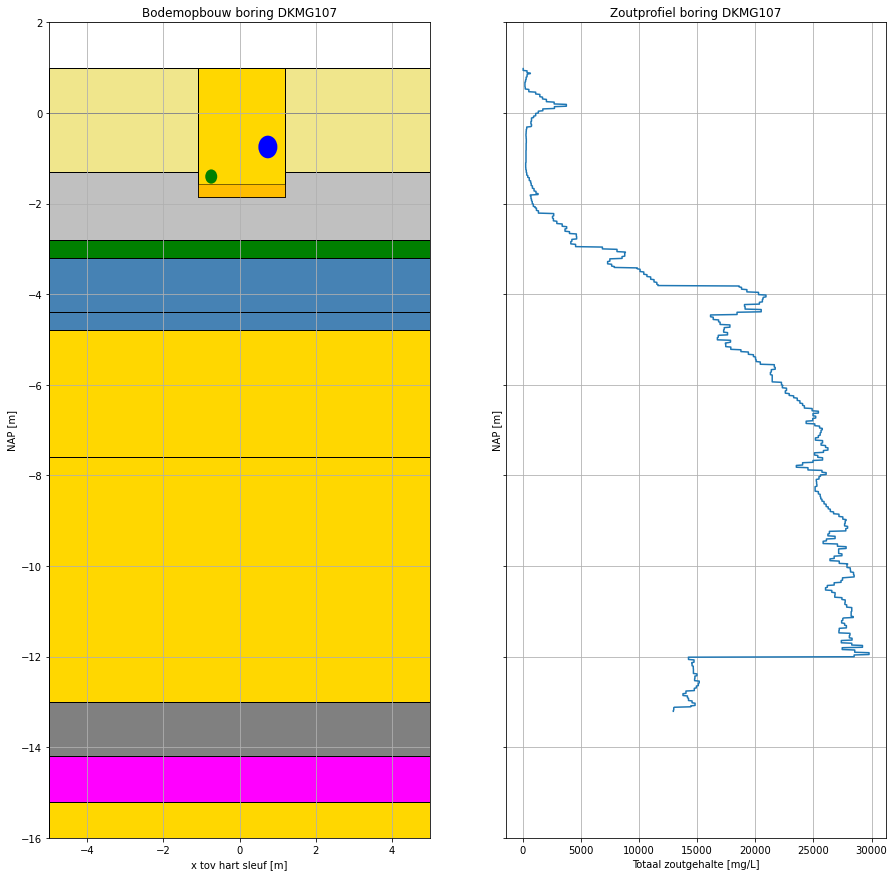

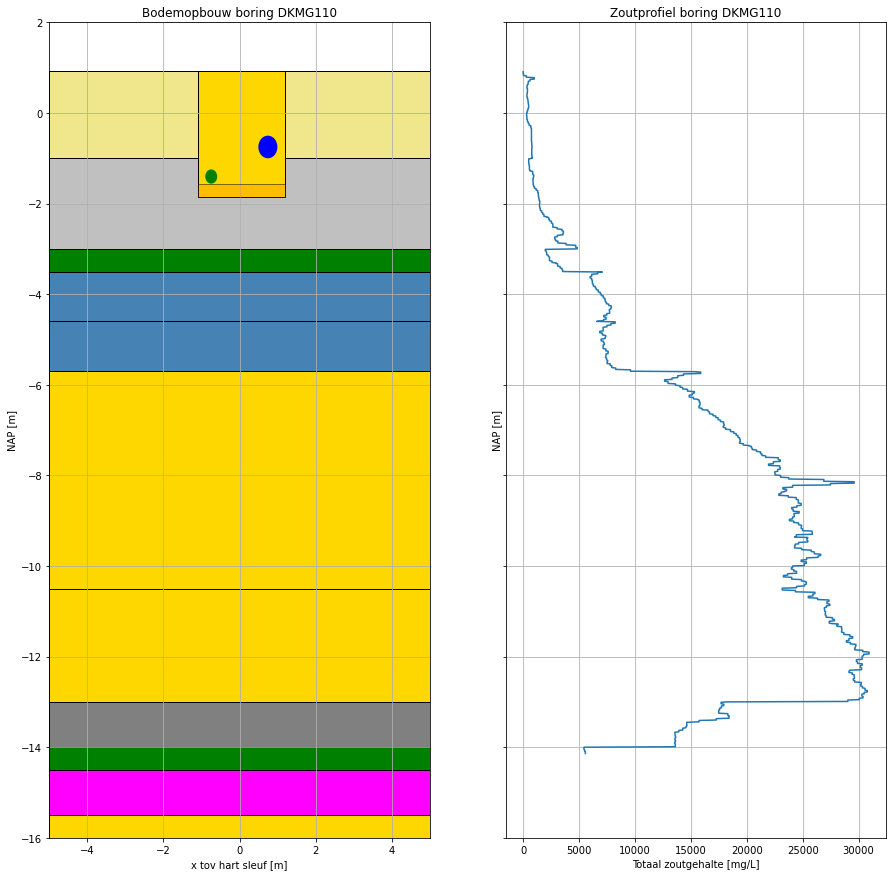

In [17]:
def twoaxes(name):
    titles =(f'Bodemopbouw boring {name}', f'Zoutprofiel boring {name}')
    xlabels =('x tov hart sleuf [m]', 'Totaal zoutgehalte [mg/L]')
    ylabels = ('NAP [m]', 'NAP [m]')
    fig, axes = plt.subplots(1, 2, sharey=True)
    fig.set_size_inches(15, 15)
    for ax, title, xlabel, ylabel in zip(axes, titles, xlabels, ylabels):
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.grid()
    return axes
    

itr = 21 # should be a trench near the borehole, this only refers to the trench excavation.
for name in sorted(names):
    ax0, ax1 = twoaxes(name)
    kzw.plot_section(boring=borehole[name], trench=trenches.trenches[itr], ylim=(-16, 2), ax=ax0, aspect='auto',
                    xlim=(-5, 5))
    tds_profiles.plot(names=name, ax=ax1)

# Overzicht van de trenches op de gekozen 30 punten in het projectgebied

In [18]:
trs = trenches.trenches
for itr, tr in enumerate(trs):
    xz = tr.trench_path.vertices
    zmin = np.min(xz[:, 1])
    w = np.max(xz[:, 0]) - np.min(xz[:, 0])
    x, y = tr.pm
    d1 = tr.pipes[0]['diam']
    d2 = tr.pipes[1]['diam']
    t1 = tr.pipes[0]['type']
    t2 = tr.pipes[0]['type']
    s = f'trench {itr:2d}, xRD={x:8.0f}, yRD={y:8.0f}, w={w:6.2f}, z_min={zmin:6.2f}, d1={d2:6.0f}/{t1}'
    if tr.ip[0] != tr.ip[1]:
        s += f', d2={d2:6.0f}/{t2} mm'
    print(s)

trench  0, xRD=  111503, yRD=  545188, w=  1.01, z_min= -1.30, d1=   250/HWA, d2=   250/HWA mm
trench  1, xRD=  111482, yRD=  545151, w=  0.65, z_min= -1.21, d1=   250/DWA
trench  2, xRD=  111519, yRD=  545144, w=  1.71, z_min= -1.30, d1=   250/HWA, d2=   250/HWA mm
trench  3, xRD=  111543, yRD=  545102, w=  2.37, z_min= -1.54, d1=   400/DWA, d2=   400/DWA mm
trench  4, xRD=  111615, yRD=  545133, w=  1.02, z_min= -1.30, d1=   250/HWA, d2=   250/HWA mm
trench  5, xRD=  111536, yRD=  545075, w=  1.81, z_min= -1.54, d1=   315/DWA, d2=   315/DWA mm
trench  6, xRD=  111425, yRD=  545101, w=  1.67, z_min= -1.30, d1=   250/HWA, d2=   250/HWA mm
trench  7, xRD=  111465, yRD=  545047, w=  1.51, z_min= -1.35, d1=   315/DWA, d2=   315/DWA mm
trench  8, xRD=  111571, yRD=  545068, w=  0.92, z_min= -1.63, d1=   400/DWA, d2=   400/DWA mm
trench  9, xRD=  111611, yRD=  545079, w=  1.05, z_min= -1.68, d1=   250/HWA, d2=   250/HWA mm
trench 10, xRD=  111636, yRD=  545050, w=  1.00, z_min= -1.55, d1=  

# Fill a Modflow model first

# Get the modflow parameters and fill the arrays

To do this pass the borehole and the trench on which the model is to be based

In [19]:
# Generate the collection of trenches
reload(kzw)
trenches = kzw.Trench_collection(os.path.join(GIS, 'punten.shp'),
                      os.path.join(GIS, 'Kruiswin12(345)_lijn.shp'), mv=0.76)

# Choose a trench for use in the model, we use trench 21 here.
itr = 21 # Trench number to use.
use_trench = trenches[itr]

# set its soil properties.
use_trench.set_soil_props(soil_props.loc['zand_trench'].copy(), trench_name=f'SLEUF_{itr}')

# ========== Generate Grid based on borehole layers and trench =========================================

# Choose the borehole to base the model on
name = "DKMG110"

# Choose grid line coordinates
x = np.hstack((np.linspace(0, 5, 21), np.logspace(np.log10(5), np.log10(250), 60)))
x = np.hstack((-x[::-1], x))
z = -np.linspace(0.5, 20, 78)

# rather base Z for MODFLOW on the borehole layers themselves and the trench
# z = np.unique(np.hstack((borehole[name].layers['NAPtop'].values,
#                borehole[name].layers['NAPbot'].values,
#                borehole[name].layers['NAPbot'].values[:-1] + 0.05, # extra yields nicer contours                        
#                trench.ghb_path.vertices.T[1])))[::-1]

# We need the x and z coordinates of our grid lines without considering the trench and the layers exactly
gr = kzw.generate_grid(borehole[name], trench=use_trench, x=x, z=[0.5], zrefine=0.25)

# Because the top aquifer is thin and has a free water table, adapt the top of the grid to this
# water table. (This is because wetting does not lead to convergence in MODFLOW2005 and, therefor, seawat.)
if False:
    Z = gr.Z; Z[0] = np.fmax(hds.get_water_table(), Z[1] + 0.01)
    gr = Grid(gr.x, gr.y, Z) # redefine gr using update top of teh grid mesh.
    # Top and bottom of the water tabel
    print(np.min(gr.Z[0]), np.max(Z[0]))

    # Make sure the borehole layer patches match with the width of the model
for name in borehole:
    borehole[name].mk_layer_patches_and_paths(xlim=(gr.x[0], gr.x[-1]))

In [20]:
gr.Z[0]

array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5]])

In [21]:
name = 'DKMG110'
par_mf = kzw.get_mflow_parameters(workbook_name=workbook, sheet_name='MFLOW',
                            layers=borehole[name].layers, trench=use_trench, gr=gr)

In [22]:
par_mf['bas']['ibound'][:, 0, [0,-1]]
par_mf['bas'][  'strt'][:, 0, [0,-1]]
par_mf['bas'][  'strt'][:, 0, -1]
par_mf['bas']['ibound'][:-12, 0, 72:88]
par_mf['bas']['strt'][:-12, 0, 72:88]

array([[ 0.   ,  0.   ,  0.   , -0.25 , -0.25 , -0.25 , -0.25 , -0.25 ,
        -0.25 , -0.25 , -0.25 , -0.25 , -0.25 ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , -1.125, -1.125, -1.125, -1.125, -1.125,
        -1.125, -1.125, -1.125, -1.125, -1.125,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , -1.375, -1.375, -1.375, -1.375, -1.375,
        -1.375, -1.375, -1.375, -1.375, -1.375,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , -1.625, -1.625, -1.625, -1.625, -1.625,
        -1.625, -1.625, -1.625, -1.625, -1.625,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , -1.805, -1.805, -1.805, -1.805, -1.805,
        -1.805, -1.805, -1.805, -1.805, -1.805,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0

# Check the modflow parameters

In [23]:
for k in par_mf.keys():
    print()
    print('key ', k, ':')
    print(par_mf[k].keys())
    print


key  bas :
dict_keys(['ibound', 'strt', 'ifrefm', 'ixsec', 'ichflg', 'stoper', 'hnoflo'])

key  dis :
dict_keys(['nlay', 'nrow', 'ncol', 'delr', 'delc', 'top', 'botm', 'laycbd', 'nper', 'perlen', 'nstp', 'tsmult', 'steady', 'itmuni', 'lenuni', 'xul', 'yul', 'rotation', 'proj4_str'])

key  evt :
dict_keys(['nevtop', 'evtr', 'surf', 'exdp', 'ipakcb'])

key  lpf :
dict_keys(['ipakcb', 'hdry', 'laytyp', 'layavg', 'chani', 'layvka', 'laywet', 'wetfct', 'iwetit', 'ihdwet', 'hk', 'hani', 'vka', 'ss', 'sy', 'vkcb', 'wetdry', 'storagecoefficient', 'constantcv', 'thickstrt', 'nocvcorrection', 'novfc'])

key  oc :
dict_keys(['ihedfm', 'iddnfm', 'chedfm', 'cddnfm', 'cboufm', 'stress_period_data', 'compact'])

key  pcg :
dict_keys(['mxiter', 'iter1', 'npcond', 'hclose', 'rclose', 'relax', 'nbpol', 'iprpcg', 'mutpcg', 'damp', 'dampt', 'ihcofadd'])

key  rch :
dict_keys(['nrchop', 'rech', 'irch', 'ipakcb'])

key  sms :
dict_keys(['mxiter', 'iter1', 'hclose', 'hiclose', 'nonlinmeth', 'linmeth'])

key

In [24]:
def listpar(pardict, parname):
    print(f"{parname}")
    print(str(pardict[parname][:, 0, :]))
    print(f"Unique values for {parname}: ", np.unique(pardict[parname].ravel()))

listpar(par_mf['bas'], 'ibound')
listpar(par_mf['bas'], 'strt')
listpar(par_mf['lpf'], 'hk')
listpar(par_mf['lpf'], 'vka')
listpar(par_mf['lpf'], 'ss')
listpar(par_mf['lpf'], 'sy')

ibound
[[-1  1  1 ...  1  1 -1]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 ...
 [-3  1  1 ...  1  1 -3]
 [-3  1  1 ...  1  1 -3]
 [-3  1  1 ...  1  1 -3]]
Unique values for ibound:  [-4 -3 -2 -1  1]
strt
[[ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 ...
 [-0.68  0.    0.   ...  0.    0.   -0.68]
 [-0.68  0.    0.   ...  0.    0.   -0.68]
 [-0.68  0.    0.   ...  0.    0.   -0.68]]
Unique values for strt:  [-1.805 -1.625 -1.375 -1.125 -0.68  -0.25   0.   ]
hk
[[5.00e+00 5.00e+00 5.00e+00 ... 5.00e+00 5.00e+00 5.00e+00]
 [2.00e-02 2.00e-02 2.00e-02 ... 2.00e-02 2.00e-02 2.00e-02]
 [2.00e-02 2.00e-02 2.00e-02 ... 2.00e-02 2.00e-02 2.00e-02]
 ...
 [6.25e+03 6.25e+03 6.25e+03 ... 6.25e+03 6.25e+03 6.25e+03]
 [6.25e+03 6.25e+03 6.25e+03 ... 6.25e+03 6.25e+03 6.25e+03]
 [6.25e+03 6.25e+03 6.25e+03 ... 6.25e+03 6.25e+03 6.25e+03]]
Unique values for hk:  [5.00e-03 1.00e-02 2.00e-02 5.00e+00 1.00e+01 6.25

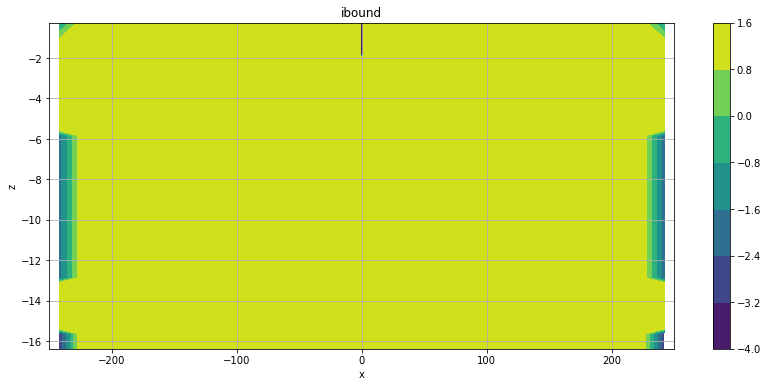

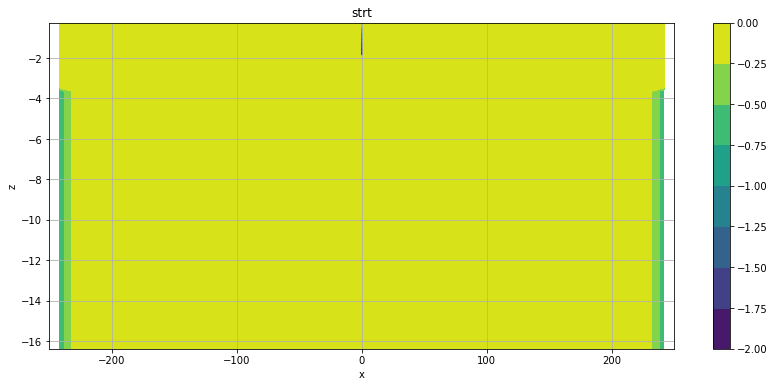

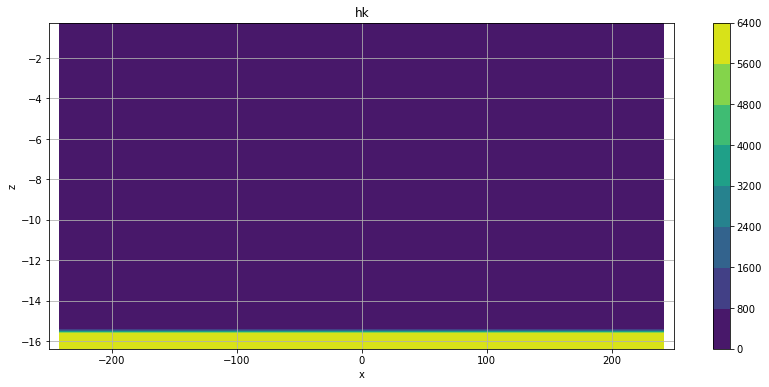

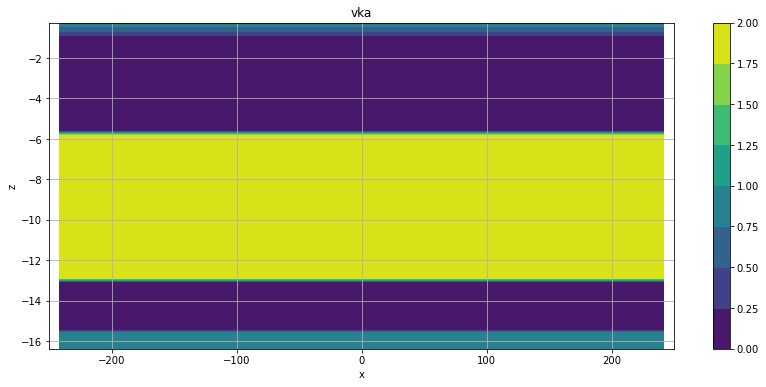

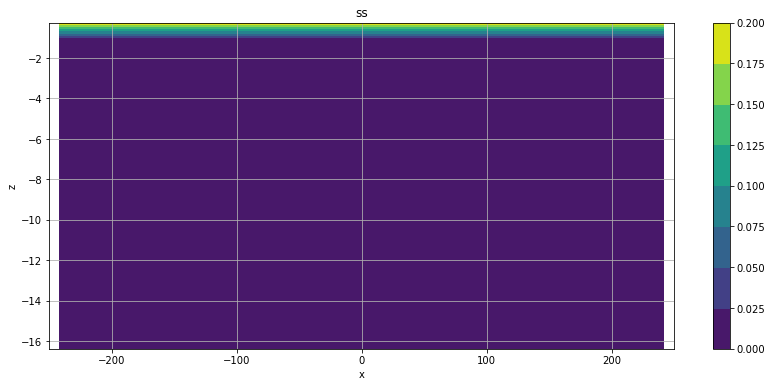

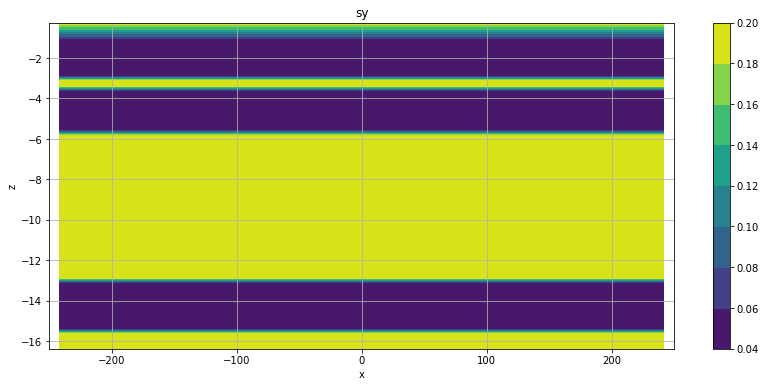

In [25]:
def showpar(pardict, parname, gr=gr, xlim=None, ylim=None):
    ax = kzw.newfig(f"{parname}", "x", "z", xlim=xlim, ylim=ylim)
    c = ax.contourf(gr.xm, gr.zm, pardict[parname][:, 0, :])
    plt.colorbar(c,ax=ax)
    
kw = {'xlim': (-5, 5), 'ylim': (-16, 2)}
kw = {'xlim': gr.x[[0, -1]], 'ylim': None}

showpar(par_mf['bas'], 'ibound', **kw)
showpar(par_mf['bas'], 'strt', **kw)
showpar(par_mf['lpf'], 'hk', **kw)
showpar(par_mf['lpf'], 'vka', **kw)
showpar(par_mf['lpf'], 'ss', **kw)
showpar(par_mf['lpf'], 'sy', **kw)

In [26]:
par_mf.keys()

dict_keys(['bas', 'dis', 'evt', 'lpf', 'oc', 'pcg', 'rch', 'sms', 'upw'])

In [27]:
#%% Ghb points
bdd = {} # no ghb riv of other boundary conditions.

case_mf = 'justmodflow'
case_mt = 'justMT3d'
case_sw = 'justSeawat'

run_seawat = True

#%% MODFLOW
model = kzw.modflow(dirs=dirs, case=case_mf, par=par_mf, bdd=bdd)

Adding justmodflow.hds (unit=51) to the output list.
adding Package:  OC
adding Package:  DIS
adding Package:  BAS6
Adding justmodflow.cbc (unit=53) to the output list.
adding Package:  RCH
adding Package:  EVT
adding Package:  LPF
adding Package:  PCG
adding Package:  LMT6
Pakages used:[dis, bas, rch, evt, oc, lpf, pcg, lmt]

Writing packages:
   Package:  OC
   Package:  DIS
   Package:  BAS6
   Package:  RCH
   Package:  EVT
   Package:  LPF
   Package:  PCG
   Package:  LMT6
 
FloPy is using the following  executable to run the model: /Users/Theo/GRWMODELS/python/Nectaerra/Kruiszwin/bin/mf2005.mac

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: justmodflow.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2020/12/05 16:44:34

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.



Reading binary head file '/Users/Theo/GRWMODELS/python/Nectaerra/Kruiszwin/data/spatial/Kruiszwin_1/justmodflow.hds' ...

Reading binary cbc file '/Users/Theo/GRWMODELS/python/Nectaerra/Kruiszwin/data/spatial/Kruiszwin_1/justmodflow.cbc' ...


(-1.0, 10.0)

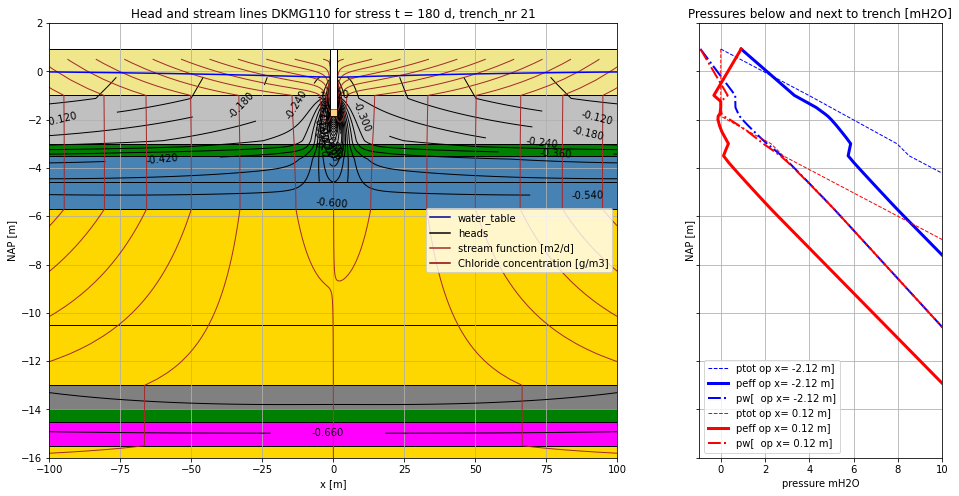

In [34]:
reload(kzw)
hds = kzw.HDS_obj(os.path.join(dirs.case_folder, case_mf), gr=gr)
cbc = kzw.CBC_obj(os.path.join(dirs.case_folder, case_mf), gr=gr)


it = par_mf['dis']['nper'] - 1
xlim = gr.x[1], gr.x[-2]

name = 'DKMG110'

axs = kzw.newfig2h(["Head and stream lines {} for stress t = {:.0f} d, trench_nr {}".format(name, hds.times[-1], itr),
                   "Pressures below and next to trench [mH2O]"],
                   ["x [m]", "pressure mH2O"],
                   ["NAP [m]", "NAP [m]"], size_inches=(16, 8), shift_fraction=0.4)


kzw.plot_section(boring=borehole[name], trench=trenches.trenches[itr],
                 xlim=gr.x[[0, -1]], ylim=(-16, 2), ax=axs[0], trenchcolor='white')


hds.plot_water_table(it=it, gr=gr, ax=axs[0])

Ch = hds.contour(it=it, levels=30, ax=axs[0], gr=gr, colors='black', linewidths=1, linestyles='solid')
my_hd_levels=[-0.5, -1.0 -1.5, -2, -2.5, -3] # for labels
ax.clabel(Ch, inline=True, fmt='%.3f', fontsize=10)

cbc.contour_streamf(it=it, gr=gr, ax=axs[0], levels=40, linewidths=1., linestyles='solid', colors='brown', zorder=2)


# Plak een witte plakker over de trench
axs[0].add_patch(kzw.PathPatch(use_trench.trench_path, fc='white', zorder=100))


label_color_dict=({
    'water_table':'darkblue',
    'heads':'black',
    'stream function [m2/d]':'brown',
    'Chloride concentration [g/m3]':'darkred'
    })

kzw.my_legend(ax=axs[0], label_color_dict=label_color_dict, loc='best')

# axs[0].set_xlim((-10, 10))
axs[0].set_xlim((-100, 100))
#ax.set_ylim((-2.5, 1.5))


# Plot the pressures ========================================================================================

peff, ptot, pw, Zsoil = pressures = hds.get_pressures(layers=borehole[name].layers, trench=use_trench, gr=gr)

for ix, clr in zip([70, 80], kzw.clrs()):
    axs[1].plot(ptot[:, 0, ix], Zsoil[:, 0, ix], '--', color=clr, lw=1, label=f'ptot op x= {gr.xm[ix]:.2f} m]')
    axs[1].plot(peff[:, 0, ix], Zsoil[:, 0, ix],  '-', color=clr, lw=3, label=f'peff op x= {gr.xm[ix]:.2f} m]')
    axs[1].plot(pw[  :, 0, ix], Zsoil[:, 0, ix], '-.', color=clr, lw=2, label=f'pw[  op x= {gr.xm[ix]:.2f} m]')
axs[1].legend()
axs[1].set_xlim((-1, 10))

#axs[0].set_position(axs[1].get_position())

# Water budget directly from cbc

In [37]:
# Water budget
ibound = par_mf['bas']['ibound']

XZ = np.stack((gr.XM.ravel(), gr.ZM.ravel())).T
L = use_trench.trench_path.contains_points(XZ).reshape(gr.shape)
Qtr1 = np.sum(cbc.cbc['CHD'][-1][L])
Qtr2 = np.sum(cbc.cbc['CHD'][-1][ibound==-4])

print(f'Qtr1 = {Qtr1:10.5f} m2/d\nQtr2 = {Qtr2:10.5f} m2/d\n')

# Total recharge
Qrch = np.sum(cbc.cbc['RCH'][-1])
Qrch = np.sum(cbc.cbc['RCH'][-1][ibound > 0])
# Print totals CHD per negative value of ibound
print("Total flow constant head and recharge per negative value of ibound")
Qtot = 0
print(f'rch              ={Qrch:10.5f}')
Qtot += Qrch
for i in np.unique(ibound)[::-1][1:]:
    Qchd = np.sum(cbc.cbc['CHD'][-1][ibound == i])
    Qtot += Qchd
    print(f'ibound = {i:2d}, Qchd={Qchd:10.5f}')
print('==============================')
print(f'Qchd total       ={Qtot:10.5f}')


Qtr1 =   -0.06249 m2/d
Qtr2 =   -0.06249 m2/d

Total flow constant head and recharge per negative value of ibound
rch              =   0.23281
ibound = -1, Qchd=   0.00671
ibound = -2, Qchd=  -0.15079
ibound = -3, Qchd=  -0.02628
ibound = -4, Qchd=  -0.06249
Qchd total       =  -0.00004


In [38]:
rch = 0.0005 * gr.DX; rch[1:] = 0
np.sum(rch[ibound > 0])

0.23281323

In [39]:
L = 100.
Qtrh = Qtr1 * L / 24
print(f"Qtrench per 100m is {Qtrh:10.4f}")

Qtrench per 100m is    -0.2604


# Zout en verplaatsing daarvanm met mt3dms

## De mt3dms parameters ophalen

In [41]:
reload(kzw)
par_mt3d = kzw.get_mt3d_parameters(workbook_name=workbook, sheet_name='MT3D',
                                   layers=borehole[name].layers,
                                   new_layers=None,
                                   trench=use_trench,
                                   ibound=par_mf['bas']['ibound'],
                                   tds_profile=tds_profiles[name],
                                   gr=gr)

## Dan mt3dms runnen

In [49]:
kzw.mt3dms(dirs=dirs, case=case_mt, par=par_mt3d, bdd=bdd, modflowmodel=model)


adding Package:  ADV
adding Package:  BTN
adding Package:  DSP
adding Package:  GCG
adding Package:  SSM
Pakages used:[adv, btn, dsp, gcg, ssm]

Writing packages:
   Package:  ADV
   Package:  BTN
   Package:  DSP
   Package:  GCG
   Package:  SSM
 
FloPy is using the following  executable to run the model: /Users/Theo/GRWMODELS/python/Nectaerra/Kruiszwin/bin/mt3dms5b.mac
 MT3DMS - Modular 3-D Multi-Species Transport Model [Version 5.20]
 Developed at University of Alabama for U.S. Department of Defense

 Using NAME File: justMT3d.nam                                      

 STRESS PERIOD NO.    1

 TIME STEP NO.    1
 FROM TIME =   0.0000     TO    180.00    

 Transport Step:    1   Step Size:  0.6619     Total Elapsed Time:  0.66185    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.6882E-03  [K,I,J]   21    1    2
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.9109E-05  [K,I,J]    3    1   86
 Transport Step:    2   Step Size:  0.6619     Total Elapsed Time:   1.3237    
 Outer Iter

 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.5208E-06  [K,I,J]    6    1   86
 Transport Step:   86   Step Size:  0.6619     Total Elapsed Time:   56.919    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.4996E-03  [K,I,J]   21    1    2
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.5204E-06  [K,I,J]    6    1   86
 Transport Step:   87   Step Size:  0.6619     Total Elapsed Time:   57.581    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.4978E-03  [K,I,J]   21    1    2
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.5200E-06  [K,I,J]    6    1   86
 Transport Step:   88   Step Size:  0.6619     Total Elapsed Time:   58.243    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.4960E-03  [K,I,J]   21    1    2
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.5196E-06  [K,I,J]    6    1   86
 Transport Step:   89   Step Size:  0.6619     Total Elapsed Time:   58.905    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.4941E-03  [K,I,J]   21    1  159
 Outer Iter.  1  Inner Iter.  2:  Max. D

 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.3679E-03  [K,I,J]   21    1  159
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.3648E-06  [K,I,J]    6    1   86
 Transport Step:  174   Step Size:  0.6619     Total Elapsed Time:   115.16    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.3667E-03  [K,I,J]   21    1    2
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.3624E-06  [K,I,J]    6    1   86
 Transport Step:  175   Step Size:  0.6619     Total Elapsed Time:   115.82    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.3654E-03  [K,I,J]   21    1  159
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.3603E-06  [K,I,J]    6    1   86
 Transport Step:  176   Step Size:  0.6619     Total Elapsed Time:   116.49    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.3642E-03  [K,I,J]   21    1    2
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.3583E-06  [K,I,J]    6    1   86
 Transport Step:  177   Step Size:  0.6619     Total Elapsed Time:   117.15    
 Outer Iter.  1  Inner Iter.  1:  Max. D

 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.2181E-06  [K,I,J]    6    1   86
 Transport Step:  256   Step Size:  0.6619     Total Elapsed Time:   169.43    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.2805E-03  [K,I,J]   21    1  158
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.2167E-06  [K,I,J]    6    1   86
 Transport Step:  257   Step Size:  0.6619     Total Elapsed Time:   170.10    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.2796E-03  [K,I,J]   21    1  158
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.2154E-06  [K,I,J]    6    1   86
 Transport Step:  258   Step Size:  0.6619     Total Elapsed Time:   170.76    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.2787E-03  [K,I,J]   21    1  158
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.2142E-06  [K,I,J]    6    1   86
 Transport Step:  259   Step Size:  0.6619     Total Elapsed Time:   171.42    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.2779E-03  [K,I,J]   21    1    3
 Outer Iter.  1  Inner Iter.  2:  Max. D

## Plaatje maken

In [51]:
ucn = kzw.UCN_obj(dirs, gr=gr)
ucn.times


Reading concentration file 'MT3D001.UCN' ...


[180.0]


Reading concentration file 'MT3D001.UCN' ...


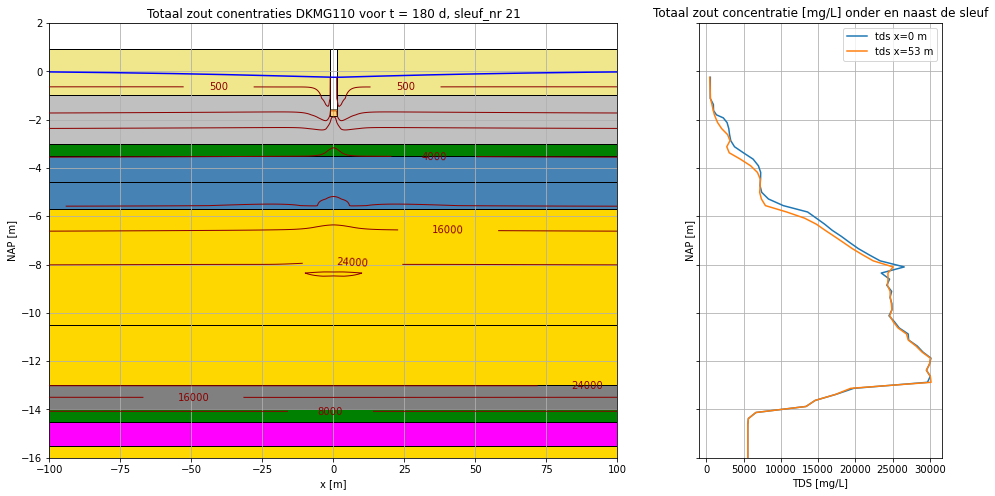

In [52]:
it = par_mf['dis']['nper'] - 1
xlim = gr.x[1], gr.x[-2]

ucn = kzw.UCN_obj(dirs, gr=gr)

name = 'DKMG110'

axs = kzw.newfig2h(["Totaal zout conentraties {} voor t = {:.0f} d, sleuf_nr {}".format(name, ucn.times[-1], itr),
                   "Totaal zout concentratie [mg/L] onder en naast de sleuf"],
                   ["x [m]", "TDS [mg/L]"],
                   ["NAP [m]", "NAP [m]"], size_inches=(16, 8), shift_fraction=0.4)


kzw.plot_section(boring=borehole[name], trench=trenches.trenches[itr],
                 xlim=gr.x[[0, -1]], ylim=(-16, 2), ax=axs[0], trenchcolor='white')


hds.plot_water_table(it=it, gr=gr, ax=axs[0])

clevels =[500, 1000, 2000, 4000, 8000, 16000, 24000, 32000]

Cs = ucn.contour(it=it, gr=gr, ax=axs[0], levels=clevels, linewidths=1., colors='darkred', zorder=3)

ax.clabel(Cs, clevels, inline=True, fmt='%.0f', fontsize=10)

axs[0].set_xlim(-100, 100)

# Zoutprofiel onder en naast de sleuf

tds_profiles[name].plot(ax=ax)
for ix in [80, 136]:
    axs[1].plot(ucn.conc[-1, :, 0, ix], gr.ZM[:, 0, ix], label=f"tds x={gr.xm[ix]:.0f} m")
    
axs[1].legend()

# Seawat

The parameters are already present so we just run seawat with it. This takes longer to run than MT3DMS due to the continuous updating of the density and the flow, which MT3DMS does not need.

In [53]:
kzw.seawat(dirs=dirs, case=case_sw, par_mf=par_mf, par_mt=par_mt3d, bdd=None )

adding Package:  DIS
adding Package:  BAS6
Adding justSeawat.cbc (unit=53) to the output list.
adding Package:  LPF
adding Package:  RCH
adding Package:  EVT
adding Package:  PCG
Adding justSeawat.hds (unit=51) to the output list.
adding Package:  OC
adding Package:  ADV
adding Package:  BTN
adding Package:  DSP
adding Package:  GCG
adding Package:  SSM
adding Package:  VDF
Pakages used:[dis, bas, lpf, rch, evt, oc, pcg, adv, btn, dsp, gcg, ssm, vdf]

Writing packages:
   Package:  DIS
   Package:  BAS6
   Package:  LPF
   Package:  RCH
Util2d rech_1: locat is None, but model does not support free format and how is internal...resetting how = external
   Package:  EVT
Util2d surf1: locat is None, but model does not support free format and how is internal...resetting how = external
Util2d evtr1: locat is None, but model does not support free format and how is internal...resetting how = external
Util2d exdp1: locat is None, but model does not support free format and how is internal...rese

 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.1635E-02  [K,I,J]   27    1    2
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.1470E-05  [K,I,J]    3    1   86
 Transport Step:   30   Step Size:  0.6607     Total Elapsed Time:   19.163    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.1618E-02  [K,I,J]   27    1    2
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.1394E-05  [K,I,J]    3    1   86
 Transport Step:   31   Step Size:  0.6607     Total Elapsed Time:   19.824    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.1599E-02  [K,I,J]   27    1    2
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.1324E-05  [K,I,J]    3    1   86
 Transport Step:   32   Step Size:  0.6607     Total Elapsed Time:   20.484    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.1581E-02  [K,I,J]   27    1    2
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.1258E-05  [K,I,J]    3    1   86
 Transport Step:   33   Step Size:  0.6607     Total Elapsed Time:   21.145    
 Outer Iter.  1  Inner Iter.  1:  Max. D

 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.1139E-02  [K,I,J]   26    1    2
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.5438E-06  [K,I,J]    6    1   76
 Transport Step:   69   Step Size:  0.6608     Total Elapsed Time:   44.932    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.1128E-02  [K,I,J]   26    1    2
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.5379E-06  [K,I,J]    6    1   76
 Transport Step:   70   Step Size:  0.6608     Total Elapsed Time:   45.593    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.1119E-02  [K,I,J]   25    1    2
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.5321E-06  [K,I,J]    6    1   76
 Transport Step:   71   Step Size:  0.6608     Total Elapsed Time:   46.254    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.1115E-02  [K,I,J]   25    1    2
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.5264E-06  [K,I,J]    6    1   76
 Transport Step:   72   Step Size:  0.6608     Total Elapsed Time:   46.914    
 Outer Iter.  1  Inner Iter.  1:  Max. D

 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.8911E-03  [K,I,J]   24    1  159
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.4758E-06  [K,I,J]    6    1   86
 Transport Step:  110   Step Size:  0.6608     Total Elapsed Time:   72.023    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.8879E-03  [K,I,J]   24    1  159
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.4745E-06  [K,I,J]    6    1   86
 Transport Step:  111   Step Size:  0.6608     Total Elapsed Time:   72.684    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.8847E-03  [K,I,J]   24    1  159
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.4731E-06  [K,I,J]    6    1   86
 Transport Step:  112   Step Size:  0.6608     Total Elapsed Time:   73.345    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.8814E-03  [K,I,J]   24    1  159
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.4718E-06  [K,I,J]    6    1   86
 Transport Step:  113   Step Size:  0.6608     Total Elapsed Time:   74.006    
 Outer Iter.  1  Inner Iter.  1:  Max. D

 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.7164E-03  [K,I,J]   24    1    2
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.4002E-06  [K,I,J]    6    1   86
 Transport Step:  153   Step Size:  0.6608     Total Elapsed Time:   100.44    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.7118E-03  [K,I,J]   24    1    2
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.3982E-06  [K,I,J]    6    1   86
 Transport Step:  154   Step Size:  0.6608     Total Elapsed Time:   101.10    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.7073E-03  [K,I,J]   24    1    2
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.3962E-06  [K,I,J]    6    1   86
 Transport Step:  155   Step Size:  0.6608     Total Elapsed Time:   101.76    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.7027E-03  [K,I,J]   24    1    2
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.3943E-06  [K,I,J]    6    1   86
 Transport Step:  156   Step Size:  0.6608     Total Elapsed Time:   102.42    
 Outer Iter.  1  Inner Iter.  1:  Max. D

 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.6053E-03  [K,I,J]   50    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.3192E-06  [K,I,J]    6    1   86
 Transport Step:  195   Step Size:  0.6608     Total Elapsed Time:   128.19    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.6032E-03  [K,I,J]   50    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.3174E-06  [K,I,J]    6    1   86
 Transport Step:  196   Step Size:  0.6608     Total Elapsed Time:   128.85    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.6012E-03  [K,I,J]   50    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.3156E-06  [K,I,J]    6    1   86
 Transport Step:  197   Step Size:  0.6608     Total Elapsed Time:   129.51    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.5992E-03  [K,I,J]   50    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.3138E-06  [K,I,J]    6    1   86
 Transport Step:  198   Step Size:  0.6608     Total Elapsed Time:   130.17    
 Outer Iter.  1  Inner Iter.  1:  Max. D

 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.5278E-03  [K,I,J]   50    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.2528E-06  [K,I,J]    6    1   86
 Transport Step:  236   Step Size:  0.6608     Total Elapsed Time:   155.28    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.5261E-03  [K,I,J]   50    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.2514E-06  [K,I,J]    6    1   86
 Transport Step:  237   Step Size:  0.6608     Total Elapsed Time:   155.94    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.5244E-03  [K,I,J]   50    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.2500E-06  [K,I,J]    6    1   86
 Transport Step:  238   Step Size:  0.6608     Total Elapsed Time:   156.60    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.5227E-03  [K,I,J]   50    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.2486E-06  [K,I,J]    6    1   86
 Transport Step:  239   Step Size:  0.6608     Total Elapsed Time:   157.26    
 Outer Iter.  1  Inner Iter.  1:  Max. D

 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.4716E-03  [K,I,J]   50    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.2083E-06  [K,I,J]    6    1   86
 Transport Step:  271   Step Size:  0.6608     Total Elapsed Time:   178.41    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.4701E-03  [K,I,J]   50    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.2072E-06  [K,I,J]    6    1   86
 Transport Step:  272   Step Size:  0.6608     Total Elapsed Time:   179.07    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.4686E-03  [K,I,J]   50    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.2060E-06  [K,I,J]    6    1   86
 Transport Step:  273   Step Size:  0.6608     Total Elapsed Time:   179.73    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.4671E-03  [K,I,J]   50    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.2049E-06  [K,I,J]    6    1   86
 Transport Step:  274   Step Size:  0.2689     Total Elapsed Time:   180.00    
 Outer Iter.  1  Inner Iter.  1:  Max. D


Reading concentration file 'MT3D001.UCN' ...


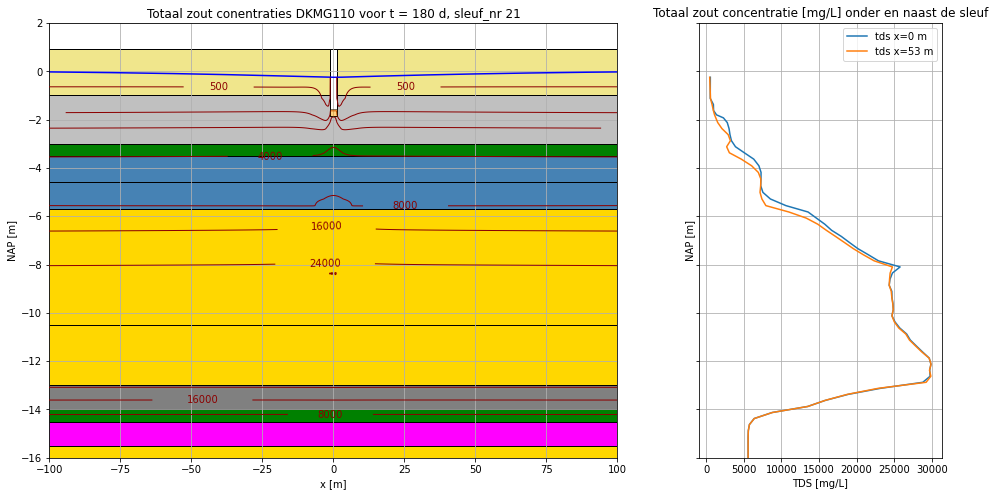

In [54]:
it = par_mf['dis']['nper'] - 1
xlim = gr.x[1], gr.x[-2]

name = 'DKMG110'

ucn = kzw.UCN_obj(dirs, gr=gr)

axs = kzw.newfig2h(["Totaal zout conentraties {} voor t = {:.0f} d, sleuf_nr {}".format(name, ucn.times[-1], itr),
                   "Totaal zout concentratie [mg/L] onder en naast de sleuf"],
                   ["x [m]", "TDS [mg/L]"],
                   ["NAP [m]", "NAP [m]"], size_inches=(16, 8), shift_fraction=0.4)



kzw.plot_section(boring=borehole[name], trench=trenches.trenches[itr],
                 xlim=gr.x[[0, -1]], ylim=(-16, 2), ax=axs[0], trenchcolor='white')


hds.plot_water_table(it=it, gr=gr, ax=axs[0])

clevels =[500, 1000, 2000, 4000, 8000, 16000, 24000, 32000]

Cs = ucn.contour(it=it, gr=gr, ax=axs[0], levels=clevels, linewidths=1., colors='darkred', zorder=3)
ax.clabel(Cs, clevels, inline=True, fmt='%.0f', fontsize=10)

axs[0].set_xlim(-100, 100)

# Zoutprofiel onder en naast de sleuf

tds_profiles[name].plot(ax=ax)
for ix in [80, 136]:
    axs[1].plot(ucn.conc[-1, :, 0, ix], gr.ZM[:, 0, ix], label=f"tds x={gr.xm[ix]:.0f} m")
    
axs[1].legend()

# Analyse freatisch vlak versus niet-freatisch vlak

Freatisch:
$$h=\sqrt{\frac n k \left(L^2 - x^2\right)}$$
Gespannen:
$$h = \frac n {2 kD} \left(L^2 - x^2\right)$$

h[0] = 0.80, phi[0]= 0.80, h[0] / phi[0] = 1.00


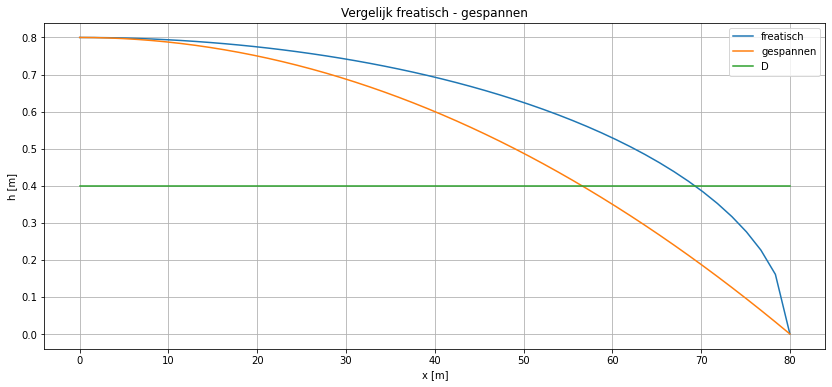

In [56]:
ax = kzw.newfig("Vergelijk freatisch - gespannen", "x [m]", "h [m]")

b, k, n, D = 80, 5, 0.0005, 1/2.5

x = np.linspace(0, b, 50)

h = np.sqrt(n / k * (b ** 2 - x ** 2))
phi = n / (2 * k * D) * (b ** 2 - x ** 2)

ax.plot(x, h, label='freatisch')
ax.plot(x, phi, label='gespannen')
ax.plot(x, D * np.ones_like(x), label='D')
ax.legend()
print("h[0] = {:.2f}, phi[0]= {:.2f}, h[0] / phi[0] = {:.2f}".format(h[0], phi[0], h[0]/phi[0]))

# Het rioolgemaal

Zie voor het boorprofiel boven, waarin alle beschikbare boringen zijn opgenomen inclusief dat uit het bemalingsrapport rapport van Fa. Beemsterboer.

Afmetingen van het gemaal zijn 2.28 x 2.28 m met de onderzijde van de funderingsplaat op NAP -4.37

De sleufbekisting heeft enkel een grondwerende functie.

Lagen

1. +0.93 -2.0 zandige ophooglaag (h = NAP -0.11 m)
2. -1.20 -5.00 slappe formatie bestaande uit klei en veen
3. -5.00 -7.50 zand, fijn met kleilenzen (h = NAP -0.56 m)
4. -7.50 -17.00 Wadformatie (h = NAP -0.40 m)
5. -17.0 -19.0 Klei
6. -19.0 -200  Pleistoceen (h = NAP - 0.56 m)

h1 = 

Ontgraven worden alleen laag 1 en deels laag 2.


In [238]:
def simpleTrench(borehole=None, w=None, zB=None, fc='white', alpha=1):
    """Return a PathPatch of a rect representing a trench.
    
    Parameters
    ----------
    borehole:
    w: float
        Total width of trenche
    zB: float
        NAP elevation of bottom of trench
    fc: color
        facecolor
    alpha: float (0 <= alpha <= 1)
        transparency of trench
    """
    xL, xR = -w/2, +w/2
    zT  = borehole.layers['NAPtop'][0]
    verts = np.array([[xL, xR, xR, xL, xL],[zB, zB, zT, zT, zB]]).T
    codes = [1, 2, 2, 2, 79] # moveto, lineto, lineto, lineto, close]
    return PathPatch(Path(verts, codes), fc=fc)
                     
                     
def well(x=None, w=None, mv=0.93, zt=None, zb=None, ax=None):
    """Genrerate a well as two patches."""
    xL = x - w/2
    xR = x + w/2
    codes = [1, 2, 2, 2, 79]
    verts = np.array([[xL, xR, xR, xL, xL], [zt, zt, mv, mv, zt]]).T
    casing = PathPatch(Path(verts, codes), fc='white')
    verts  = np.array([[xL, xR, xR, xL, xL], [zb, zb, zt, zt, zb]]).T
    screen = PathPatch(Path(verts, codes), fc='gray')
    ax.add_patch(casing)
    ax.add_patch(screen)
              
def rect(xL=None, xR=None, zB=None, zT=None, fc='orange', ax=None):
    """Add rectangle to axes."""
    verts = np.array([[xL, xR, xR, xL, xL],[zB, zB, zT, zT, zB]]).T
    ax.add_patch(PathPatch(Path(verts, [1, 2 , 2, 2, 79]), fc=fc))

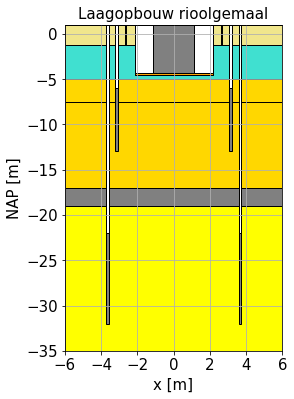

In [248]:
w_gemaal = 2.28
w_bouwput = 4.30
zG = -4.37
zB = zG -  0.15
zMV = 0.93
xlim = (-6, 6)
xw = w_bouwput / 2 + 0.5
xp = xw + 0.5
xr = xp + 0.5

bodem = borehole['Rioolgemaal']
bodem.mk_layer_patches_and_paths(xlim)

ax = kzw.newfig("Laagopbouw rioolgemaal", "x [m]", "NAP [m]", xlim=xlim, ylim=(-35, 1))
bodem.plot_layers(xlim=xlim, ax=ax)

layers = bodem.layers.copy()
layers['head'] = [-0.11, np.nan, -0.56, -0.4, np.nan, -0.56]

tr = simpleTrench(bodem, w=w_bouwput, zB=zB)
ax.add_patch(tr)

rect(-w_bouwput / 2, w_bouwput / 2, zB, zMV, fc='white', ax=ax)
rect(-w_bouwput / 2, w_bouwput / 2, zB, zG, fc='orange', ax=ax)
rect(-w_gemaal  / 2, w_gemaal  / 2, zG, zMV, fc='gray', ax=ax)

if True:
    well(x=-xw, w=0.08, zt=-0, zb=-1.2, ax=ax)
    well(x=+xw, w=0.08, zt=-0, zb=-1.2, ax=ax)

    well(x=-xp, w=0.125, zt=-6, zb=-13, ax=ax)
    well(x=+xp, w=0.125, zt=-6, zb=-13, ax=ax)
    well(x=-xr, w=0.125, zt=-22, zb=-32, ax=ax)
    well(x=+xr, w=0.125, zt=-22, zb=-32, ax=ax)

ax.set_ylim(-35, 1)
ax.set_aspect(0.5)


reading .pdbrc file in ~/Theo   ... done
> <ipython-input-177-3ae53d36c394>(18)add_ptot()
     16     if i is None:
     17         pdb.set_trace()
---> 18         i = len(layers) - 1
     19         if 'ptTop' not in layers.columns:
     20             layers['ptTop'] = np.nan

ipdb> c
5
4
3
2
1
0


59.70359166666666

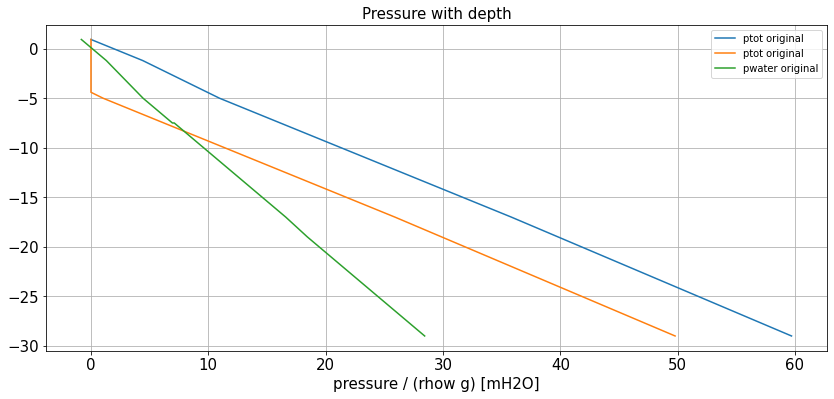

In [177]:
rhow = 1000.

def add_ptot(layers, i=None):
    """Return pd.DataFrame layrs with ptTop and ptBot added.
    
    The computation is done recursively
    
    Parameters
    ----------
    layers: pd.DataFrame
        layer propeties
    i : int
        item number in pd.DataFrame.index
        use None to start.
    """
    if i is None:
        pdb.set_trace()
        i = len(layers) - 1
        if 'ptTop' not in layers.columns:
            layers['ptTop'] = np.nan
        if 'ptBot' not in layers.columns:
            layers['ptBot'] = np.nan
    if i<0:
        return 0.
    
    idx = layers.index[i]
    print(idx)
    
    lay = layers.loc[idx]
    g_lay = (lay['NAPtop'] - lay['NAPbot']) * lay['rhob_wet'] / rhow
    
    layers.loc[idx, 'ptTop'] = add_ptot(layers, i-1)
    layers.loc[idx, 'ptBot'] = layers.loc[idx, 'ptTop'] + g_lay
    
    return layers.loc[idx, 'ptBot']


def ptot(layers, z_ex=None):
    """Return total pressure given excavation elevation in mHO
    
    The pressure at the bottom of each layer is computed from the weight of the overlaying layer and
    later cumsumming downward over all layers. This way the pressure at the top is zero.
    
    If z_ex is not none, then we have to substract the pressure of the all layers down to z_ex and
    set the pressure of all higher elevations equal to zero.
    
    Parameters
    ----------
    layers: pd.DataFrame
        layers
    z_ex: float or None
        exacavation depth    
    """
    z = np.hstack((layers['NAPtop'][0], layers['NAPbot']))
    dp_tot = (layers['NAPtop']  - layers['NAPbot']) * layers['rhob_wet'] / rhow  # [mH2O]
    ptot = np.hstack((0, np.cumsum(dp_tot)))
    zptot = np.vstack((z, ptot)).T
    
    # return as an array [z, ptot]
    if z_ex is not None:
        #pdb.set_trace()
        p_ex = np.interp(z_ex, zptot.T[0][::-1], zptot.T[1][::-1])
        zptot = np.vstack((zptot[zptot.T[0] >= z_ex, :],
                           np.array([z_ex, p_ex]),
                           zptot[zptot.T[0] < z_ex, :]))
        zptot[zptot.T[0] > z_ex, 1]  = 0
        zptot[zptot.T[0] <= z_ex, 1] -= p_ex
    return zptot

def pwat(layers, z_ex=None):
    """Return water pressure in mH2O
    
    The water pressure is simply (phi - z) rhow g for all elevations within the layer in which the
    head is known. To pressure in mH2O is iply (phi - z) for these layers.
    
    The pressures at the top and bottom are of each layer of which the head is known are collected and
    then joined together. The pressures in clay layers are unknown (np.nan) and are not collected, i.e.
    ignored. This has the effect hat after joining, the pressure in such low-permeability layers is interpolated
    between the bottom of the overlaying and the top of the underlaying pervious layer.
    
    Parameters
    ----------
    layers: pd.DataFrame
        layer properties
    z_ex: float
        excavaton depth. This point is just inserted in the output
    """
    # accumulate the data from layers that have a head specified
    layers['pwTop'] = np.nan
    layers['pwBot'] = np.nan
    for idx in layers.index:
        phi = layers.loc[idx, 'head']
        if not np.isnan(phi):
            layers.loc[idx, 'pwTop'] = phi - layers.loc[idx, 'NAPtop']
            layers.loc[idx, 'pwBot'] = phi - layers.loc[idx, 'NAPbot']
    for idx in layers.index:
        if layers.loc[idx, 'head'] == np.nan:
            try:
                layers.loc[idx, 'pwTop'] = layers[idx - 1, 'pwBBot']
            except:
                pass
            try:
                layers.loc[idx, 'pwBot'] = layers[idx + 1, 'pwTop']
            except:
                pass
    return layers


    
# Show total and water pressure with depth (in mH2O for convenience)
z_ex = -4.4
# Axes
ax = kzw.newfig("Pressure with depth", "pressure / (rhow g) [mH2O]", )


pt_orig = ptot(layers)           # Total pressure before or next to excavation
pt_new = ptot(layers, z_ex=z_ex) # Total pressure after excavation

# Water pressure without pumping
pw_orig = pwat(layers, z_ex=z_ex) # z_ex is inserted in the list of points

# Required drawdown in each layer (for top of each pervious layer)
#pt_new - pw_orig

ax.plot(pt_orig[:,1], pt_orig[:, 0], label='ptot original')
ax.plot(pt_new[:,1], pt_new[:, 0], label='ptot original')

ax.plot(pw[:, 1], pw[:, 0], label='pwater original')
plt.legend()
#plt.grid()
#plt.show()

add_ptot(layers)

In [181]:
layers[['stype', 'NAPtop', 'NAPbot', 'head', 'pwTop', 'pwBot', 'ptTop', 'ptBot']]

,stype,NAPtop,NAPbot,head,pwTop,pwBot,ptTop,ptBot
0,zand_H1,0.93,-1.2,-0.11,-1.04,1.09,0.000000,4.414425
1,klei_slap_veen,-1.20,-5.0,NaN,NaN,NaN,4.414425,10.953592
2,zand_H2,-5.00,-7.5,-0.56,4.44,6.94,10.953592,16.134842
3,zand_H2,-7.50,-17.0,-0.40,7.10,16.60,16.134842,35.823592
4,klei_Hb,-17.00,-19.0,NaN,NaN,NaN,35.823592,39.803592
5,zand_pleist,-19.00,-29.0,-0.56,18.44,28.44,39.803592,59.703592
